In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('titanic.csv')
print(df.describe())
print(df.isna().sum().to_string())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

In [4]:
df1=df.drop(columns=['Name','Ticket','Cabin','PassengerId','SibSp','Parch','Embarked'])
df1=pd.get_dummies(df1,dtype=int)
print(df1.corr())

            Survived    Pclass       Age      Fare  Sex_female  Sex_male
Survived    1.000000 -0.338481 -0.077221  0.257307    0.543351 -0.543351
Pclass     -0.338481  1.000000 -0.369226 -0.549500   -0.131900  0.131900
Age        -0.077221 -0.369226  1.000000  0.096067   -0.093254  0.093254
Fare        0.257307 -0.549500  0.096067  1.000000    0.182333 -0.182333
Sex_female  0.543351 -0.131900 -0.093254  0.182333    1.000000 -1.000000
Sex_male   -0.543351  0.131900  0.093254 -0.182333   -1.000000  1.000000


In [18]:
df['Age'].fillna(mean(df['Age']),inplace=True)
X=df1.drop(columns=['Survived'])
Y=df['Survived']

In [81]:
model=DecisionTreeClassifier()
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2)
model.fit(X,Y)

DecisionTreeClassifier()

In [82]:
ans=model.predict([[1,24,246,1,0]])
print(ans)
model.score(X,Y)

[1]


0.8832772166105499

<Axes: xlabel='Pclass'>

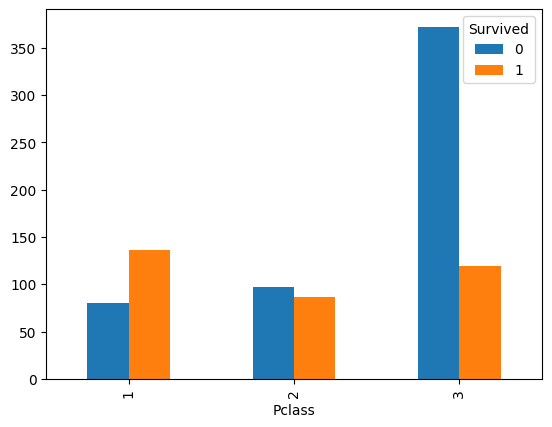

In [83]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')